In [50]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
from mpl_toolkits import mplot3d
import itertools

### Optimal Value Check

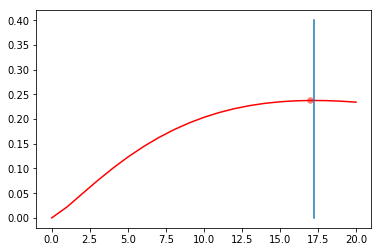

In [3]:
plt_max_val(0.8,0.93)

## Theoretical Optimals

In [4]:
dim = 101
T = 20
c_space  = np.round(np.linspace(0.2,5,dim),4)
d_space  = np.round(np.linspace(0.8,1.0,dim), 4)
cs = np.zeros(dim*dim)
ds = np.zeros(dim*dim)
zs = np.zeros(dim*dim)
i = 0
for c in c_space:
    for d in d_space:
        cs[i] = c
        ds[i] = d
        zs[i] = optimal_time(c,d,T)
        i += 1

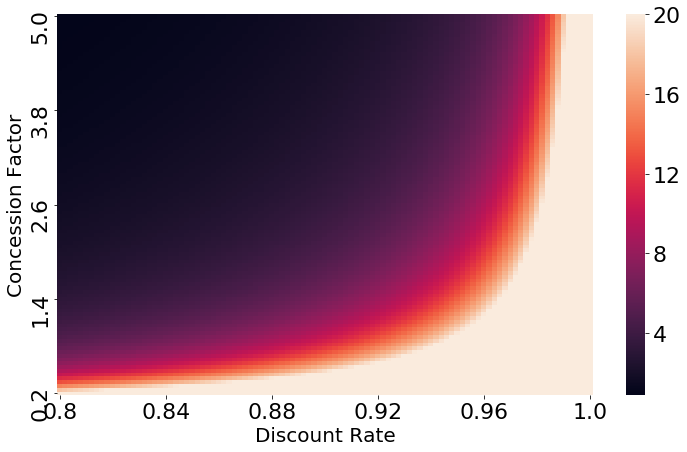

In [5]:
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22)
plt.figure(figsize=(12,7))
data = pd.DataFrame(data={'concession':cs, 'discount':ds, 'z':zs})
data = data.pivot_table(index='concession', columns='discount', values='z')
ax = sns.heatmap(data, xticklabels=20, yticklabels=25,)
plt.xlabel("Discount Rate", fontsize = 20)
h = plt.ylabel("Concession Factor", fontsize = 20)
ax.invert_yaxis()
plt.savefig("Theoretical_Optimal_offers.png")

## Nash Solutions

In [46]:
dim = 50
xs = np.linspace(0,1,dim)
ys = np.linspace(0,1,dim)
zs = np.linspace(0,1,dim)
my_U  = np.zeros(dim*dim*dim)
opp_U = np.zeros(dim*dim*dim)
os = np.zeros((dim*dim*dim,3))
i = 0
for x in xs:
    for y in ys:
        for z in zs:
            os[i] = np.array([x,y,z])
            my_U[i], opp_U[i] = calc_utils(np.array([x,y,z]))
            i += 1

In [25]:
print(plt.style.available)

['seaborn-dark', 'seaborn-muted', 'dark_background', 'seaborn-paper', 'seaborn', 'seaborn-white', 'seaborn-notebook', 'fivethirtyeight', 'seaborn-darkgrid', 'seaborn-ticks', 'fast', 'seaborn-talk', '_classic_test', 'classic', 'seaborn-whitegrid', 'seaborn-bright', 'tableau-colorblind10', 'bmh', 'seaborn-deep', 'seaborn-colorblind', 'grayscale', 'seaborn-poster', 'seaborn-dark-palette', 'ggplot', 'seaborn-pastel', 'Solarize_Light2']


Text(4, 4, 'Nash Point')

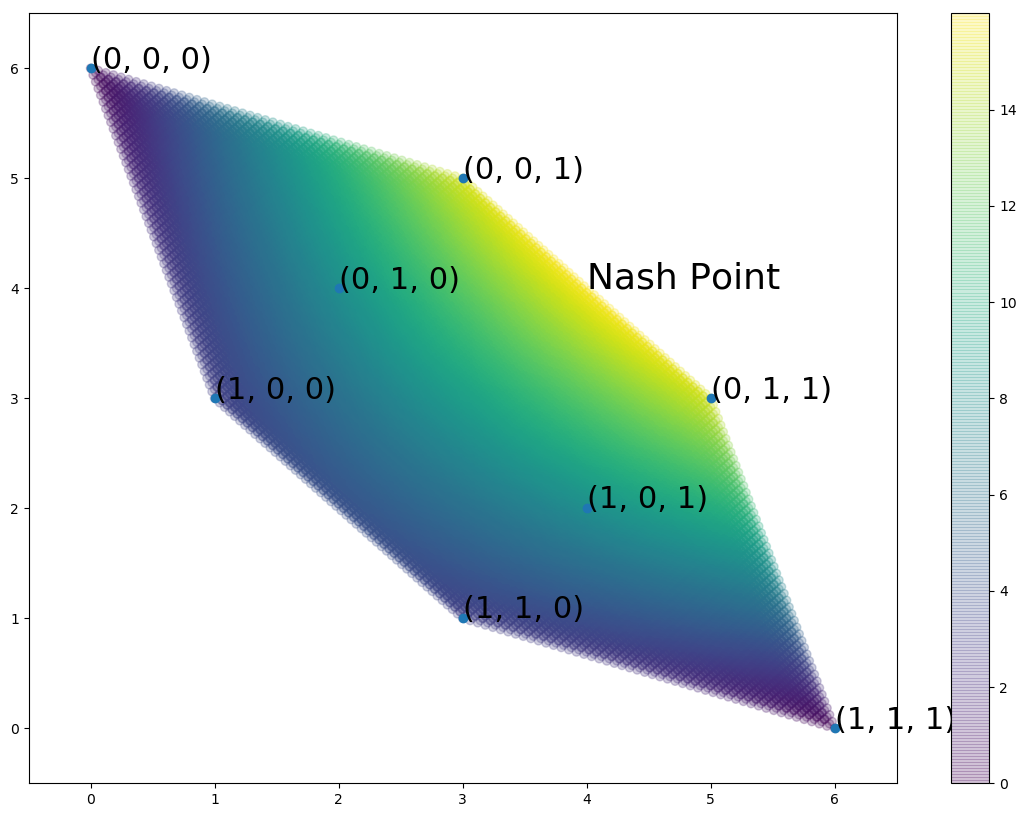

In [47]:
matplotlib.style.use("default")
Nash_Sol = my_U * opp_U
plt.figure(figsize=(14,10))
plt.scatter(my_U, opp_U,c = Nash_Sol, alpha = 0.25)       
plt.colorbar()
lst = list(itertools.product([0, 1], repeat=3))
verts = np.array([lst])[0]
my_U_V, opp_U_V = np.zeros(len(verts)), np.zeros(len(verts))
for i,v in enumerate(verts):
    my_U_V[i], opp_U_V[i] = calc_utils(v)
    
plt.scatter(my_U_V, opp_U_V,cmap = "k") 
plt.xlim(-0.5,6.5)
plt.ylim(-0.5,6.5)
for i, txt in enumerate(lst):
    plt.annotate(txt, (my_U_V[i], opp_U_V[i]),fontsize=22)
plt.annotate("Nash Point", (4,4), fontsize = 26)
# plt.savefig("figures/nash_space.png")

## Time-dependent Utils

In [48]:
dim = 10
# dim = 50
xs = np.linspace(0,1,dim)
ys = np.linspace(0,1,dim)
zs = np.linspace(0,1,dim)
my_U  = np.zeros(dim*dim*dim)
opp_U = np.zeros(dim*dim*dim)
os = np.zeros((dim*dim*dim,3))
i = 0
for x in xs:
    for y in ys:
        for z in zs:
            os[i] = np.array([x,y,z])
            my_U[i], opp_U[i] = calc_utils(np.array([x,y,z]))
            i += 1
t = np.arange(1,25,4)

my_time_Us = np.ones((len(t),dim*dim*dim))
d = 0.9
my_time_Us[0] = my_U
for i, U in enumerate(my_time_Us):
    if i ==0:
        continue
    my_time_Us[i] = my_time_Us[i-1] * d
    
my_time_Us  = xs = my_time_Us.reshape(len(t)*dim*dim*dim)
opp_time_Us = ys = np.tile(opp_U, len(t))
ts =          zs =np.repeat(t, dim*dim*dim)
Nash_Sol    = xs * ys

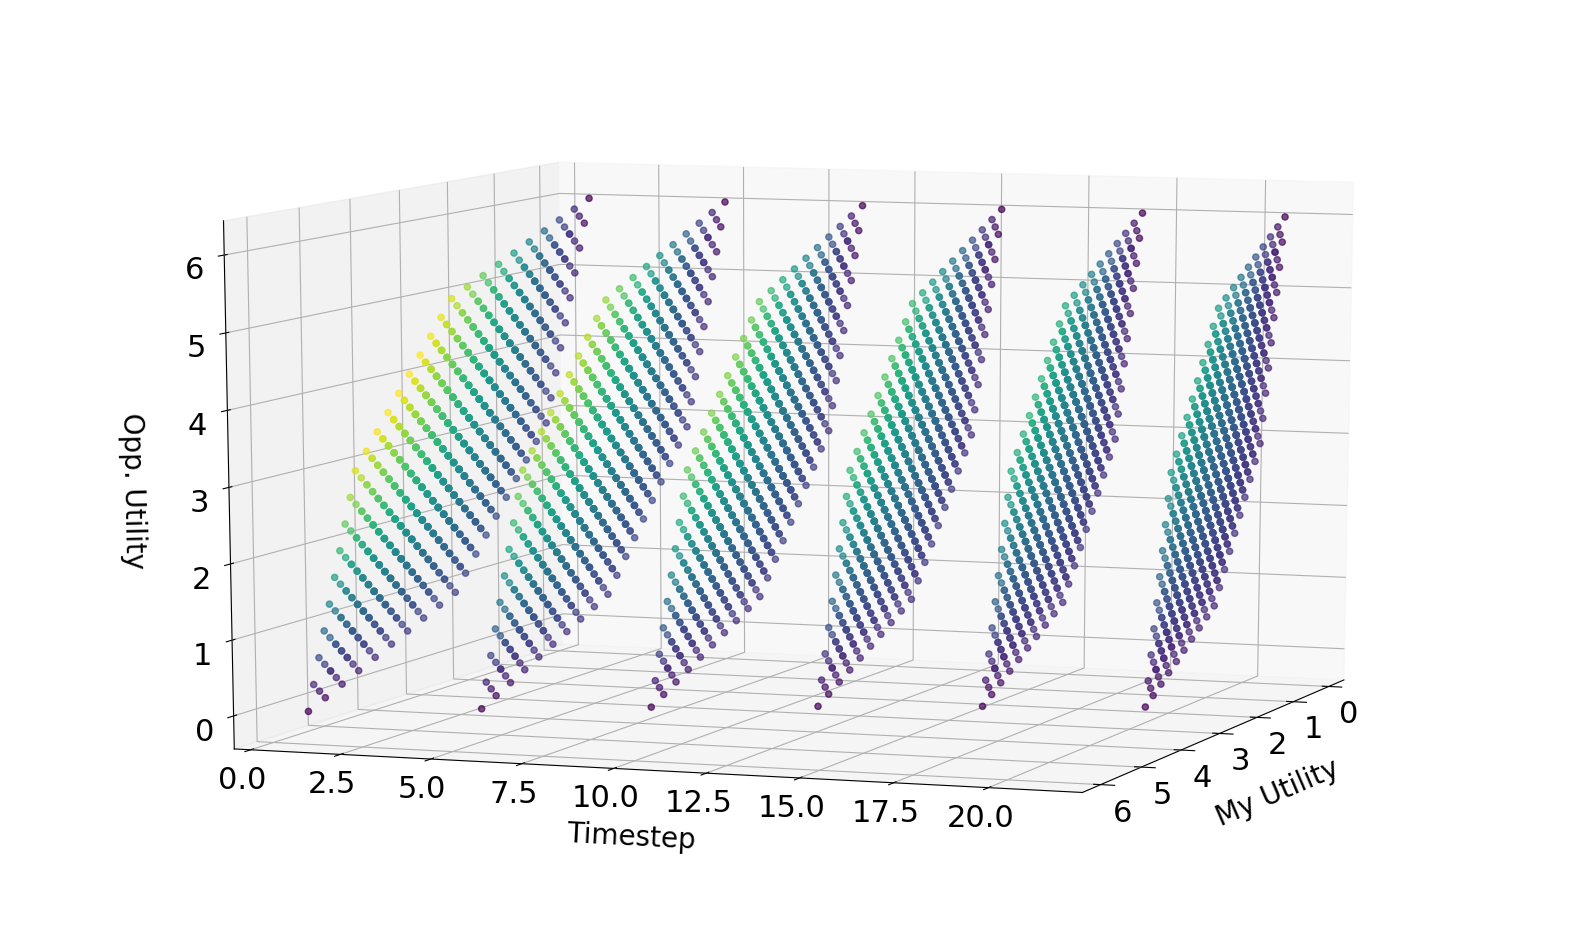

In [51]:
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22)
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
ax = plt.axes(projection='3d')
ax.view_init(10, 20)
ax.scatter3D(xs, ts, ys, c = Nash_Sol, alpha = 0.7)
# plt.legend(fontsize = 16)
# plt.title("Offer Value by Decision Util and Timestep", fontsize = 24)
plt.xlabel("\n\nMy Utility", fontsize = 20)
plt.ylabel("\n\nTimestep", fontsize = 20)
ax.set_zlabel("\n\nOpp. Utility", fontsize = 20)
plt.savefig("pareto-time.png")

## Functions and Classes

In [2]:
def theoretical(c,d):
    return -1/(c*np.log(d))

def optimal_time(c,d,T):
    theo = -1/((c)*np.log(d-0.001))
    if theo > T:
        return T
    else:
        return theo

def plt_max_val(c, discount):
    X1, P_res = boulware_actions(c)
    P_res = np_1D(P_res)
    discount_index = np.ones(21)
    for i, __ in enumerate(discount_index):
        if i == 0:
            continue
        else:
            discount_index[i] = discount_index[i-1] * discount
    my_value = discount_index * (6-P_res)/6
    plt.plot(my_value, label = "Max Val.", color = "red")
    plt.scatter(np.argmax(my_value), np.max(my_value), s = 30, c="salmon")
    theo = theoretical(c, discount)
    plt.plot(np.ones(30)*theo, np.linspace(0,0.4,30))
    
def boulware_actions(c):
    r = 0.0
    T = 20
    V = torch.Tensor([3,2,1])
    c_list = [c]
    X = []
    P_res = []

    for c in c_list:
        a = boulware(V,T,c,r)
        for t in range(T+1):
            state = a.generate_offer(t) # what the agent sees
            uts = a.calc_decision_util(t)
            X.append(state)
            P_res.append(torch.Tensor([uts*6]))

    P_res = torch.stack(P_res)
    # P_res = torch.cat((P_res, P_res, P_res, P_res, P_res))
    X1 = torch.stack(X)
    # X  = torch.cat((X1, X1, X1, X1, X1))
    return X1, P_res

class boulware(object):
    def __init__(self,V,T, c,r):
        self.V = V
        self.T = T
        self.c = c
        self.r = r
    
    def calc_Ft(self,t):
        return (t/self.T)**(1/self.c)

    def calc_decision_util(self,t):
        Ft = self.calc_Ft(t)
        ut = self.r + (1 - self.r)*(1-Ft)
        return ut
    
    def generate_offer(self,t):
        # How to decide which axis to concede.
        ut = self.calc_decision_util(t)
        ut *= torch.sum(self.V)
        
        X = torch.clamp((ut / self.V[0]) + np.random.normal(scale=0.05) ,0,1)
        if X == 1:
            ut -= X*self.V[0]
            Y = torch.clamp((ut / self.V[1])+ np.random.normal(scale=0.05) ,0,1)
            if Y == 1:
                ut -= Y*self.V[1]
                Z = torch.clamp((ut / self.V[2])+ np.random.normal(scale=0.05) ,0,1)
            else:
                Z = 0
        else:
            Y = Z = 0
        
#         print(torch.Tensor([X,Y,Z]))
        return torch.Tensor([X,Y,Z,t])

    def receive(self,offer,t):
        my_offer = 1-offer
        ut = self.calc_decision_util(t)
        ut *= torch.sum(self.V)
        if torch.sum(self.V * my_offer) > ut:
            return torch.Tensor([1])
        else:
            return torch.Tensor([0])
        
def np_1D(X):
    return X.squeeze().detach().numpy()

In [7]:
def Nash_solution(O):
    my_util  = O * torch.Tensor([1,2,3])
    opp_util = (1-O) * torch.Tensor([3,2,1])
    return my_util, opp_util

def calc_utils(O):
    my_util  = np.sum(O * np.array([1,2,3]))
    opp_util = np.sum((1-O) * np.array([3,2,1]))
    return my_util, opp_util